In [1]:
import numpy as np
import gurobipy as gp
import matplotlib.pyplot as plt

In [2]:
mu, sigma = 100, 20
N = 10000
c_h, c_p = 1.0, 5.0

In [3]:
np.random.seed(10)
xi_samples = np.random.normal(loc=mu, scale=sigma, size=N)

In [4]:
hist, bin_edges = np.histogram(xi_samples, bins=10)
hist_p = hist / hist.sum() * 100
bin_width = bin_edges[1] - bin_edges[0]
bin_midpoints = (bin_edges[1:] + bin_edges[:-1]) / 2

In [5]:
model = gp.Model()

Set parameter Username
Set parameter LicenseID to value 2659802
Academic license - for non-commercial use only - expires 2026-05-01


In [6]:
q = model.addVar(lb=0.0)

In [7]:
over = {}
under = {}

In [8]:
for i, xi in enumerate(xi_samples):
    over[i] = model.addVar(lb=0.0)
    under[i] = model.addVar(lb=0.0)
    model.addConstr(over[i] >= q - xi)
    model.addConstr(under[i] >= xi - q)


In [9]:
objval = (
    c_h * gp.quicksum(over[i] for i in over)
    + c_p * gp.quicksum(under[i] for i in under)
) / N


In [10]:
model.setObjective(objval, gp.GRB.MINIMIZE)
model.optimize()

Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (linux64 - "Arch Linux")

CPU model: 12th Gen Intel(R) Core(TM) i7-12700, instruction set [SSE2|AVX|AVX2]
Thread count: 20 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 20000 rows, 20001 columns and 40000 nonzeros
Model fingerprint: 0xf4ee9fda
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-04, 5e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+01, 2e+02]



Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 Dense cols : 1
 AA' NZ     : 2.960e+03
 Factor NZ  : 5.921e+03 (roughly 2 MB of memory)
 Factor Ops : 1.184e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.55833259e+02  0.00000000e+00  3.39e+01 0.00e+00  2.41e+01     0s
   1   1.78101069e+02  7.03603494e+00  0.00e+00 7.16e-03  2.40e+00     0s
   2   6.99247435e+01  1.41636134e+01  0.00e+00 2.81e-14  6.03e-01     0s
   3   3.54309950e+01  2.36675762e+01  0.00e+00 2.22e-16  1.27e-01     0s
   4   3.18244860e+01  2.84156620e+01  0.00e+00 2.22e-16  3.68e-02     0s
   5   2.99807921e+01  2.92285476e+01  0.00e+00 3.18e-14  8.13e-03     0s
   6   2.95147361e+01  2.93458142e+01  0.00e+00 2.22e-16  1.83e-03     0s
   7   2.94010879e+01  2.93769684e+01  0.00e+00 2.41

In [11]:
q_result = q.getAttr("X")

In [12]:
q_result

119.27938130754782

In [13]:
objval.getValue()

29.42551957736913

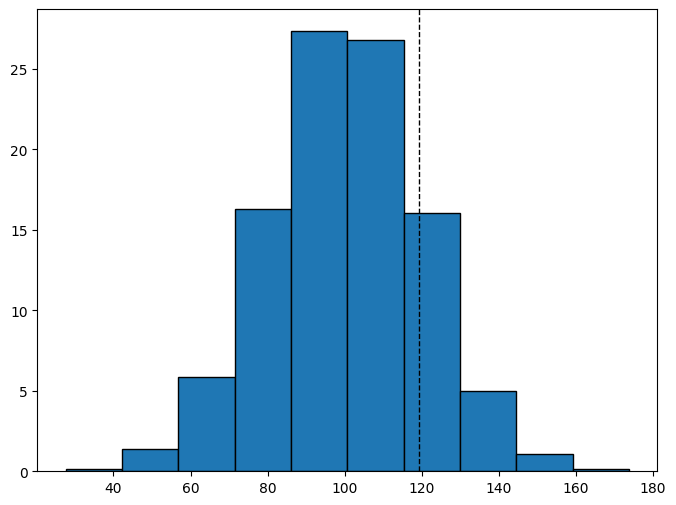

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.bar(bin_midpoints, hist_p, width=bin_width, edgecolor="black")


ymin, ymax = ax.get_ylim()

ax.vlines(x=q_result, ymin=ymin, ymax=ymax, ls="--", lw=1, colors="black")

ax.set_ylim(ymin, ymax)
plt.show()

In [15]:
overs = np.array([over[i].getAttr("X") for i in range(N)])
unders = np.array([under[i].getAttr("X") for i in range(N)])

In [38]:
import matplotlib.axes._axes as axes

def return_histogram(
    ax: axes.Axes, 
    arr: np.ndarray, 
    num_bins: int=10
):
    hist, bin_edges = np.histogram(arr, bins=num_bins)
    hist_p = hist / hist.sum() * 100
    bin_width = bin_edges[1] - bin_edges[0]
    bin_midpoints = (bin_edges[1:] + bin_edges[:-1]) / 2
    ax.bar(bin_midpoints, hist_p, width=bin_width, edgecolor="black")
    return ax

In [39]:
float((fig.get_size_inches() * fig.dpi)[1])

600.0

In [47]:
ax = return_histogram(ax, overs)
plt.show()

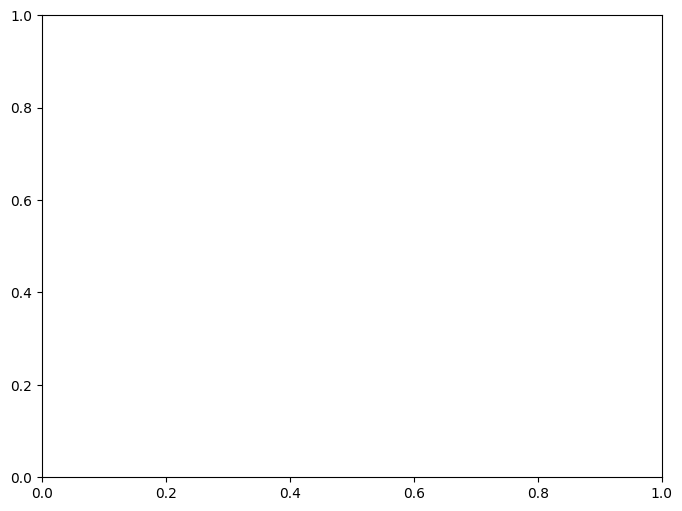

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# plt.show()

In [33]:
plt.gcf().get_size_inches()[1]

np.float64(4.8)

<Figure size 640x480 with 0 Axes>

In [18]:
ax = return_histogram(ax, unders)

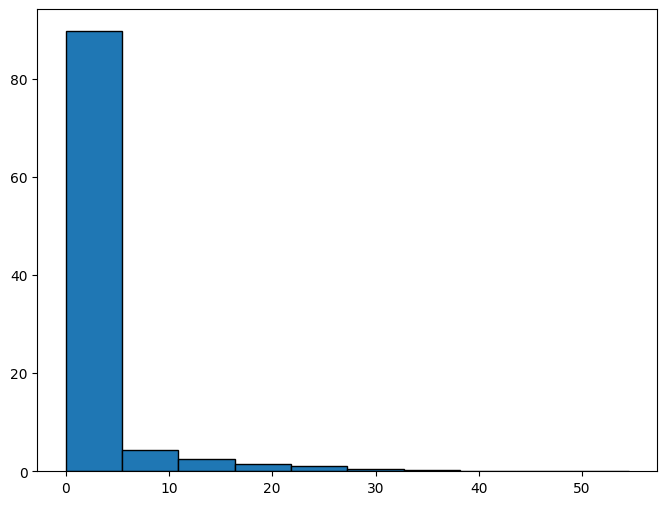

In [19]:
hist, bin_edges = np.histogram(unders, bins=10)
hist_p = hist / hist.sum() * 100
bin_width = bin_edges[1] - bin_edges[0]
bin_midpoints = (bin_edges[1:] + bin_edges[:-1]) / 2
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.bar(bin_midpoints, hist_p, width=bin_width, edgecolor="black")


ymin, ymax = ax.get_ylim()

# ax.vlines(x=q_result, ymin=ymin, ymax=ymax, ls="--", lw=1, colors="black")

ax.set_ylim(ymin, ymax)
plt.show()